# Are Pitbulls one of the most problematic dog Breeds?



> by: Anna Bellizzi & Nicole George

---





## Introduction

We have all heard that “pitbulls are one of the most dangerous dog breeds”, but we want to see the data behind it and prove that every dog is different, just like every human is different.  We want to figure out what is the likelihood of a bite incident occurring in a dog’s lifetime based on size, breed and age.  We want to compare this data to people’s perception of how dangerous specific breeds are regardless of size, age, or breed.  The machine learning aspect will be using intelligence to predict the likelihood of a dog biting and hopefully help more people be able to adopt dogs that are better suited for them, capable of handling, and ultimately have every dog end up in a Forever Home.


Below is the imports that will be needed for running the dataframes, visualizations, and machine learning predictions.



In [30]:
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import tarfile
from sklearn.linear_model import LinearRegression
from scipy import stats

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

# switch to seaborn default stylistic parameters
# see the useful https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context('paper') # 'talk' for slightly larger

# change default plot size
rcParams['figure.figsize'] = 9,7

In [32]:
# required packages according to PetFinder 
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import sklearn.metrics as metrics
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import cohen_kappa_score
#from sklearn.linear_model import LogisticRegression
#from sklearn.naive_bayes import GaussianNB 
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler, OneHotEncoder
#from sklearn.model_selection import GridSearchCV

In [33]:
from google.colab import drive
drive.mount('/content/drive')
# /content/drive/Shareddrives/Data Science Project/DogBiteData/ny-dog-bites-2015-2021-CLEAN.csv
#dog bite data

#/content/drive/Shareddrives/Data Science Project/DogBiteData/sf-raw-data-dog-bites-2014-2018-CLEAN.csv
#sf raw dog bite data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# San Francisco Bite Data 2014-2018

San Francisco Bite Data, 2014-2018 - Total rows: 3863<br>
Exported PDF to Exel via Adobe Acrobat<br>
Removed rows that contained only total by breed sections - 267 rows<br>
Removed header rows that appeard within the doc as a PDF - 475 rows<br>
Split bite severity into two seperate columns - BITE_CODE and BITE_SEVERITY<br>
**Retaining both columns for now, both are not necessary since they contain the same infomation**<br>
Replaced alpha "U" code in BITE_SEVERITY for UNKNOWN to 9 to match numeric convention of the column<br>
Removed spaces in BITE_SEVERITY alpha codes for ease of search<br>
Removed BITE column because each row value for that column was 1. Each row represents a single event already, column is not necessary.<br>
Total Rows: 3626<br>
Total Cols: 5<br>
Change column names to all lowercase<br>
Imported as CSV - sf-raw-data-dog-bites-2014-2018-CLEAN.csv<br>
<br>
**NOTE** need to correct breed_group, both of these exist in the column: 'GREAT PYRENEES' 'GREAT PYRENEESE'


     breed_group  primary_breed  bite_code bite_severity gender
0  AFFENPINSCHER  AFFENPINSCHER          0       SNGLNIP      S
1  AFFENPINSCHER  AFFENPINSCHER          1         SNGLB      U
2   AFGHAN HOUND   AFGHAN HOUND          1         SNGLB      N
3  AIREDALE TERR  AIREDALE TERR          0       SNGLNIP      N
4  AIREDALE TERR  AIREDALE TERR          1         SNGLB      N
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3625 entries, 0 to 3624
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   breed_group    3625 non-null   object
 1   primary_breed  3625 non-null   object
 2   bite_code      3625 non-null   int64 
 3   bite_severity  3625 non-null   object
 4   gender         3625 non-null   object
dtypes: int64(1), object(4)
memory usage: 141.7+ KB


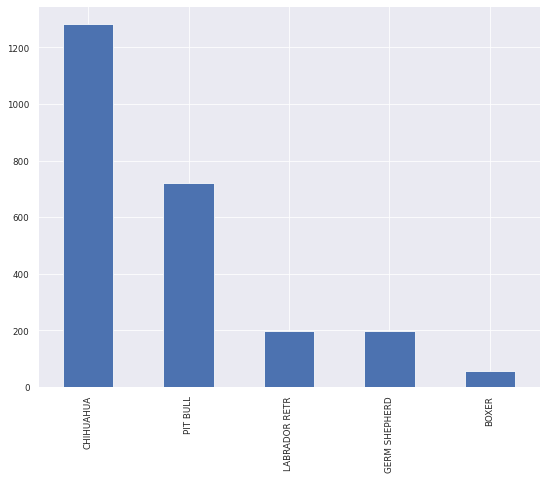

In [34]:
df_sf = pd.read_csv("/content/drive/Shareddrives/Data Science Project/DogBiteData/sf-raw-data-dog-bites-2014-2018-CLEAN.csv")
df_sf.head()
###breed_group may be an unnecessary column:
#breed_group = df_sf.breed_group
#print(breed_group.unique())
#primary_breed = df_sf.primary_breed
#print(primary_breed.unique().size)
print(df_sf.head())
df_sf.info()

df_sf['breed_group'].value_counts().nlargest(5).plot(kind='bar')



# New York Bite Data 2015-2021

Removed columns Borough, ZipCode, Species<br>
Combined Gender and Spay/Neuter columns to match format of DF_SF gender column<br>
Removed Key column and Date of bite column<br>
Ages modified to standard values, removed alphas and turned numbers into decimal value in years.<br>
Added Bad_Data column to tag potentially bad rows that could be thrown out of the dataset without tossing them out quite yet.<br>
Added breed_group column to match df_sf dataset and clarify primary_breed values that specify a group.<br>
Added Multi-Dog column for entries invloving more than one dog in description. Low numbers, may consider dropping these rows.<br><br>
Standardized breed column and breed_group column.<br> About 450 rows out of 22,000 were unable to be categorized, but contain dog descriptions so data was kept and categorized as "unknown".
<br><br>
The data does not include whether one dog is a multi-offender, which may or may not be significant for our analysis.<br><br>
This dataset can potentially be joined to the SF dataset on the breed_group	primary_breed	and	gender columns.<br><br>
may consider adding a bite_code column with code 1 for all entries. Since an entry here implies an incident it would match up to the existing column in the sf data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22663 entries, 0 to 22662
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   breed_group    20445 non-null  object
 1   primary_breed  20445 non-null  object
 2   age            22663 non-null  object
 3   modified_age   22658 non-null  object
 4   gender         22663 non-null  object
 5   multi_dog      22663 non-null  object
 6   bad_data       22663 non-null  object
dtypes: object(7)
memory usage: 1.2+ MB


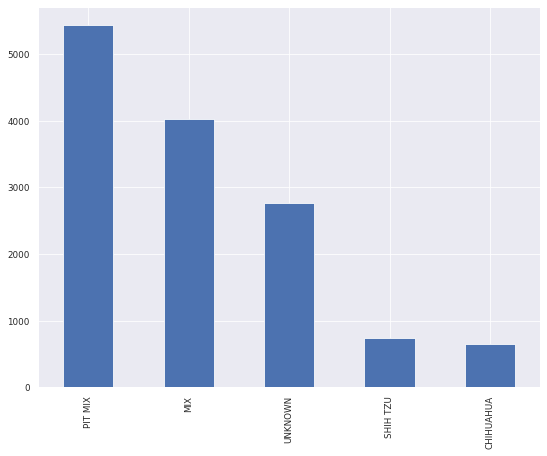

In [35]:
df_ny = pd.read_csv("/content/drive/Shareddrives/Data Science Project/DogBiteData/ny-dog-bites-2015-2021-CLEAN.csv")
df_ny.head()
df_ny.info()

df_ny['breed_group'].value_counts().nlargest(5).plot(kind='bar')

#Merged Bite Data- SF and NY combined

In [36]:
df_md = pd.read_csv("/content/drive/Shareddrives/Data Science Project/DogBiteData/merged-bite-data.csv")
df_md.head()
df_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26288 entries, 0 to 26287
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dataset        26288 non-null  object
 1   breed_group    24070 non-null  object
 2   primary_breed  24070 non-null  object
 3   bite_code      26288 non-null  int64 
 4   bite_severity  26288 non-null  object
 5   gender         26288 non-null  object
 6   age            22663 non-null  object
 7   modified_age   22658 non-null  object
 8   multi_dog      22663 non-null  object
 9   bad_data       22663 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.0+ MB


We can see there is not a clear relationship between bit severity and gender:

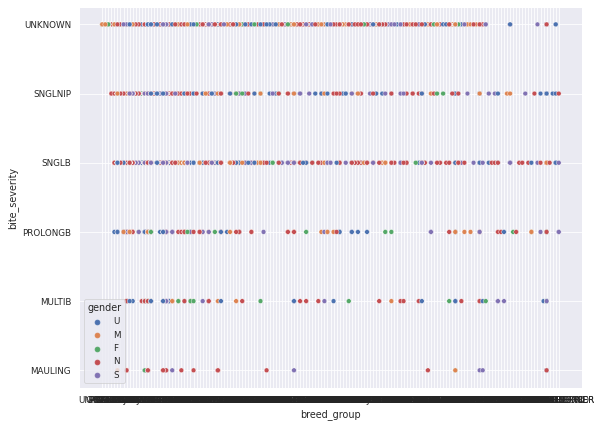

In [37]:
sns.scatterplot(x = 'breed_group', y = 'bite_severity', data=df_md, hue='gender')

# Dog Breeds Enriched

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               195 non-null    object 
 1   Breed Group AKC     195 non-null    object 
 2   Breed Group CKC     195 non-null    object 
 3   Breed Group UKC     195 non-null    object 
 4   CKC Subgroup        194 non-null    object 
 5   height_low_inches   195 non-null    float64
 6   height_high_inches  195 non-null    float64
 7   average height      195 non-null    float64
 8   weight_low_lbs      195 non-null    float64
 9   weight_high_lbs     195 non-null    int64  
 10  average weight      195 non-null    float64
 11  Lifespan Low        194 non-null    float64
 12  Lifespan High       194 non-null    float64
 13  average lifespan    195 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 21.5+ KB


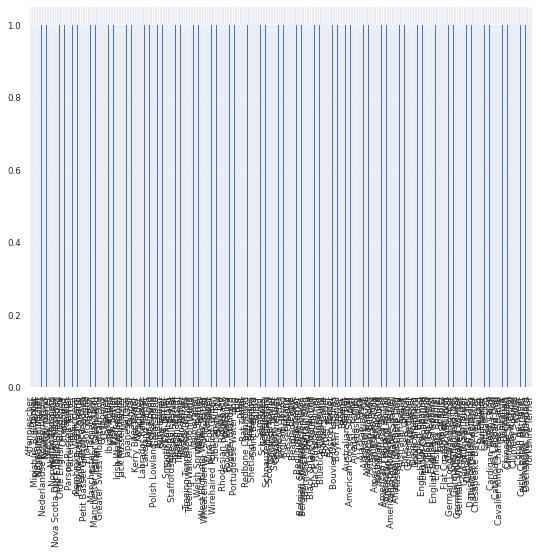

In [38]:
df_be = pd.read_csv("/content/drive/Shareddrives/Data Science Project/DogBiteData/dog breeds_enriched_20210503.csv")

df_be.head()
df_be.info()

df_be['Breed'].value_counts().plot(kind='bar')

#Note change name to breed_group to be able to combine all 3 data sets

Average weights by breed

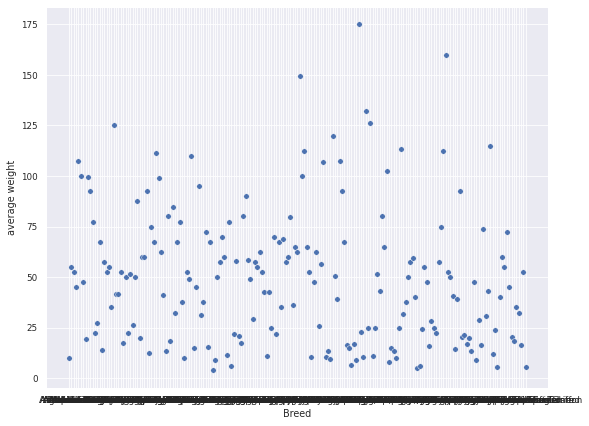

In [39]:
sns.scatterplot(x = 'Breed', y = 'average weight', data=df_be, s=30)

Compare breed names used in NY and SF data files to those in the enriched breed name dataset

In [40]:
sfBreeds = pd.Series(df_sf['breed_group'])
nyBreeds = pd.Series(df_ny['breed_group'])
breeds = pd.Series(df_be['Breed'])

ser = pd.Series(dtype='object')
ser = ser.append(sfBreeds.str.lower())
ser = ser.append(nyBreeds.str.lower())
ser = ser.append(breeds.str.lower())
#print(ser.unique())

# Stanford Dogs Dataset Images of Dog Breeds

In [41]:
#Since this is a tarfile I am having trouble opening it, it was only going to be used for aestetic purposes. 
#I will continue working on this before the project is due.
#df_st = pd.read_csv('/lists.tar', compression='gzip', header=0, sep=' ', quotechar='"', error_bad_lines=False)
#OPEN TAR WITH WINZIP

Read the data

**Initial exploration**

[/]how much data is there?


[]how many NA values are in the data?


does the dataset contain much obviously bad data?

what are the types of the columns?

functions like info() and describe() are helpful in this stage

**Initial preprocessing and cleaning**

remove columns with lots of missing data

remove columns that are useless

remove columns that are not relevant to what you want to do

remove other missing data

**Exploration and visualization**

histograms of single numeric variables

bar plots of value counts of single categorical variables

grid of scatter plots (numeric variables)

violin/bar plots for categorical/numeric variable pairs

three-variable plots, such as scatterplots with color or shape of points as a third variable, or grouped bar plots
plots of data over time (if applicable)

Final preprocessing and cleaning

convert categorical to numeric data

scale data if needed


**Machine learning**

accuracy

confusion matrix

precision/recall

ROC curve, precision/recall curve (if predictions are probabilities)

MSE, RMSE

R-squared statistic (usually computed on training data)

predicted/actual scatterplot

grid search to tune hyperparameters

feature selection (such as forward feature selection)

learning curve

create training and test sets

train model and make predictions

assess results (classification case)

assess result (regression case)

tuning

cross-validation can be used in both assessment and tuning

assess bias/variance


# Merging Data Sets



<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 0 to 590
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   breed_group    591 non-null    object
 1   primary_breed  591 non-null    object
 2   bite_code      591 non-null    int64 
 3   bite_severity  591 non-null    object
 4   gender         591 non-null    object
 5   age            591 non-null    object
 6   modified_age   591 non-null    object
 7   multi_dog      591 non-null    object
 8   bad_data       591 non-null    object
dtypes: int64(1), object(8)
memory usage: 46.2+ KB


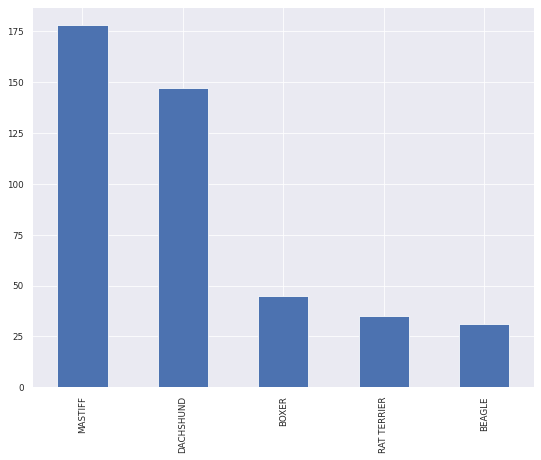

In [42]:
data= pd.merge(df_sf, df_ny)
data
data.head()
data.info()

data['breed_group'].value_counts().nlargest(5).plot(kind='bar')

#Incidents by top 5 breeds

Consider analyzing top 3 breeds from NY data and better categorizing. Many "MIX" and unknown can be identified by breeds listed in the dog breeds_enriched dataset.

CHIHUAHUA        1281
PIT BULL          719
LABRADOR RETR     198
GERM SHEPHERD     198
BOXER              56
Name: breed_group, dtype: int64
PIT MIX      5437
MIX          4029
UNKNOWN      2762
SHIH TZU      732
CHIHUAHUA     648
Name: breed_group, dtype: int64


Text(0.5, 1.0, 'New York Incidents')

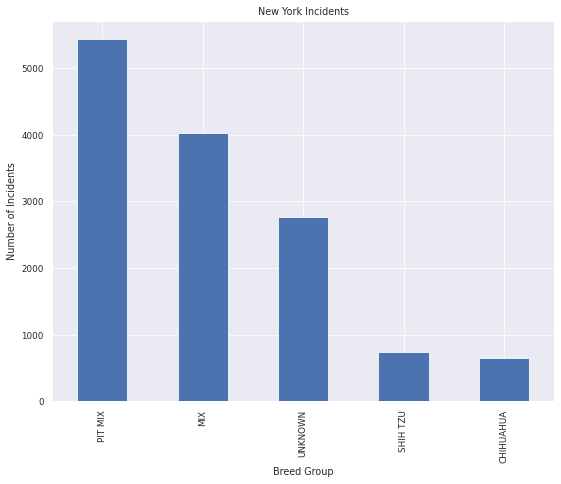

In [43]:
sf_inc = df_sf['breed_group'].value_counts().nlargest(5)
ny_inc = df_ny['breed_group'].value_counts().nlargest(5)
print(sf_inc)
print(ny_inc)


sf_inc.plot(kind='bar')
plt.xlabel("Breed Group")
plt.ylabel("Number of Incidents")
plt.title("San Francisco Incidents")

ny_inc.plot(kind='bar')
plt.xlabel("Breed Group")
plt.ylabel("Number of Incidents")
plt.title("New York Incidents")

As you can see here, the largest breed groups by incidents are chihuahua according to san fransisco and pitmix according to new york.

# Machine Learning

We are going to start by using linear regression for the machine learning.

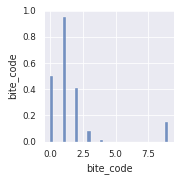

In [44]:
sns.pairplot(data)
plt.show()

In [45]:
X=data[['breed_group']]
y=data['breed_group'].values

regr=LinearRegression()
regr.fit(X,y)
fit= regr.predict(X)

sns.regplot(x=fit, y='breed_group', data=df_sf)
plt.show()
#Getting error with not converting string to float for 'affenpinscher'

ValueError: ignored

We are going to predict the likelihood of a bite incident occuring in a dog's lifetime based on size, breed, and age. 

We will compare this data by people's perception based on breed banning in different states.

# Conclusion

Our goal is to help people understand that all dogs need to be trained regardless of breed.  
We hope to give knowledge to everyone to help find the breeds that are suitable for them to prevent people from giving up their dogs.